In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
df = pd.read_csv("C:/Users/PC/Desktop/brazil.csv") # read_csv: inbuilt function of pandas to read files
df 

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
print(df.shape)

(10692, 13)


In [6]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

LEVEL 1 Analysis 
-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types

### These are the kinds of analysis that can be performed on categorical data
1. Check if the variable is Nominal or Ordinal.
2. Check how many categories are present.
3. Check the Mode.
4. Check for Missing values.
5. Think about how the missing values could be treated?
6. What kind of graph/chart can be plotted using this data?

Note: We are analyzing only one column at a time (Univariate Analysis)

# Separating Categorical and Numerical Variables

In [10]:
# Separating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 25:       # nunique:  returns unique values in the column,
                                                    #here 20 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User defined functions for level 1 analysis of categorical columns
This function will check for the following:
Unique values 
Mode 
Sum of all the null values 
Total count of missing values 

In [10]:
def info_of_cat(col):
    print("Unique values in",col,"are: ",df[col].unique())
    print("Mode of", col,"is: ",df[col].mode()[0])
    print("No of missing values in", col,"is",df[col].isnull().sum())
    if df[col].isnull().sum()>0:
        print("\nThere are null values in the",col,"column")

# 1. Analysis of City:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [11]:
info_of_cat("city")

Unique values in city are:  ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is:  São Paulo
No of missing values in city is 0


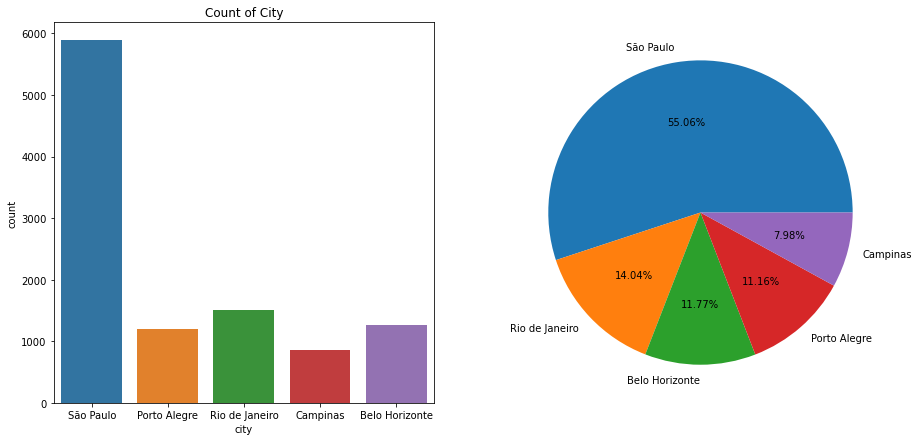

In [12]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of City")
Percentage=df["city"].value_counts()
labels=list(df["city"].value_counts().index)

sns.countplot(x= df["city"],ax=ax[0])
plt.pie(Percentage,labels=labels,autopct="%0.2f%%")

plt.show()

## Interpretation: Results show that only 55.6% of the estates belong to Sao Paulo city which is the highest among other cities in Brazil while 7.98% of the estates belong to the Campinas city  which is the lowest.

# 2. Analysis of Room:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [13]:
info_of_cat("rooms")

Unique values in rooms are:  [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is:  3
No of missing values in rooms is 0


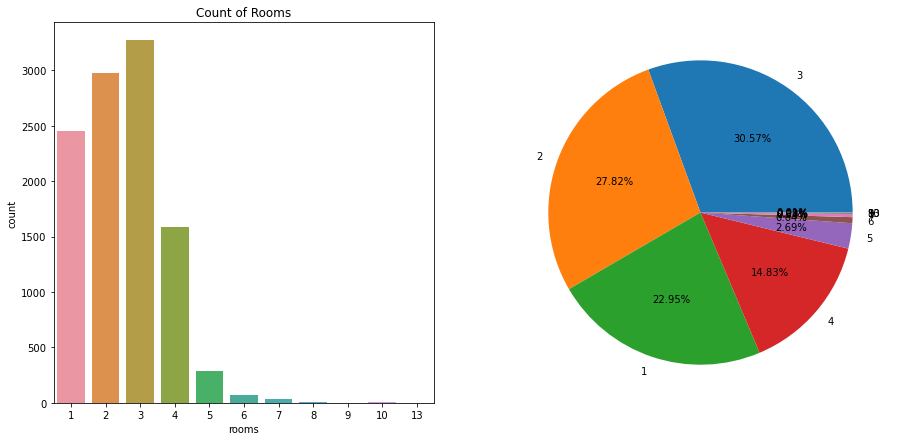

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Rooms")
Percentage=df["rooms"].value_counts()
labels=df["rooms"].value_counts().index

sns.countplot(x=df["rooms"],ax=ax[0])
plt.pie(Percentage,labels=labels,autopct="%0.2f%%")

plt.show()

## Interpretation: Results show that only 30.57% of the estates have 3 rooms which is the highest in Brazil 

# 3. Analysis of BathRoom:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [15]:
info_of_cat("bathroom")

Unique values in bathroom are:  [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is:  1
No of missing values in bathroom is 0


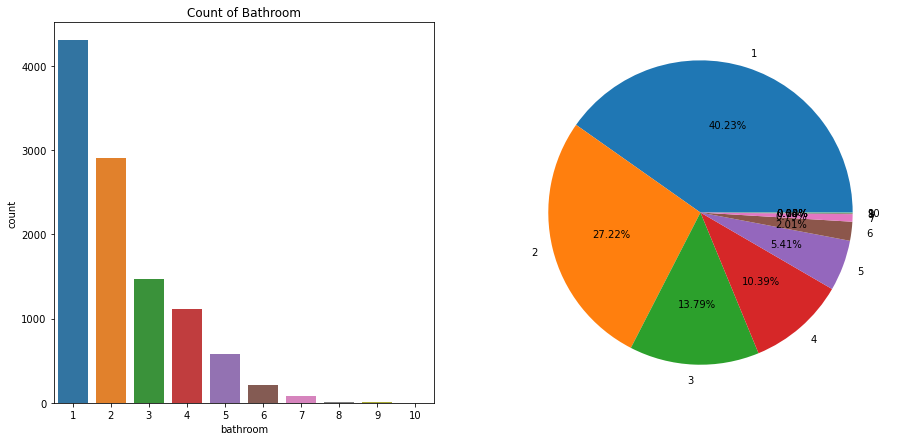

In [16]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Bathroom")
Percentage=df["bathroom"].value_counts()
labels=df["bathroom"].value_counts().index

sns.countplot(x=df["bathroom"],ax=ax[0])
plt.pie(Percentage,labels=labels,autopct="%0.2f%%")

plt.show()

## Interpretation: Results show that only 40.23% of the estates have 1 bathrooms which is the highest in Brazil 

# 4. Analysis of ParkingSpaces:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [17]:
info_of_cat("parking spaces")

Unique values in parking spaces are:  [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is:  1
No of missing values in parking spaces is 0


In [18]:
len(Percentage)

10

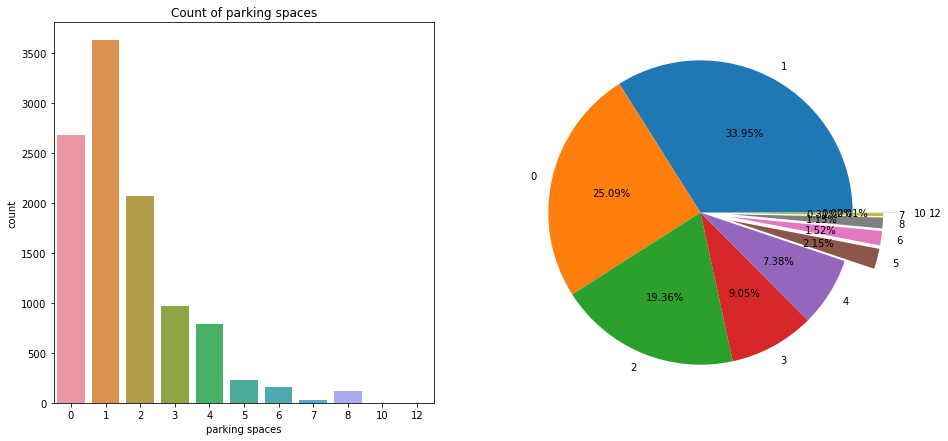

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of parking spaces")
Percentage=df["parking spaces"].value_counts()
labels=df["parking spaces"].value_counts().index

sns.countplot(x=df["parking spaces"],ax=ax[0])
plt.pie(Percentage,labels=labels, explode= [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4], autopct="%0.2f%%")

plt.show()

## Interpretation: Results show that only 33.95% of the estates have 1 parking space which is the highest in Brazil 

# 5. Analysis of Animal:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [20]:
info_of_cat("animal")

Unique values in animal are:  ['acept' 'not acept']
Mode of animal is:  acept
No of missing values in animal is 0


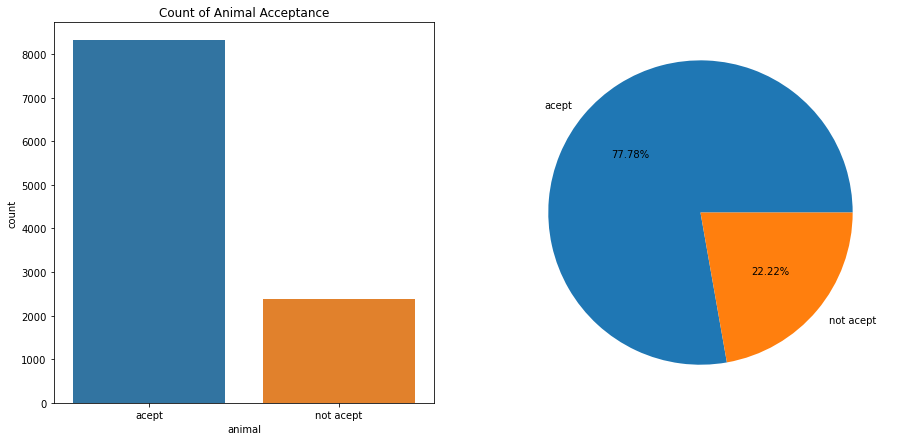

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Animal Acceptance")
Percentage=df["animal"].value_counts()
labels=df["animal"].value_counts().index

sns.countplot(x=df["animal"],ax=ax[0])
plt.pie(Percentage,labels=labels,autopct="%0.2f%%")

plt.show()

## Interpretation: Results show that only 77.78% of the estates accept animals in their estates which is the highest in Brazil while 22.22% of the estates don't accept animals in their estates 

# 6. Analysis of Furniture:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [22]:
info_of_cat("furniture")
Percentage=df["furniture"].value_counts()
Percentage

Unique values in furniture are:  ['furnished' 'not furnished']
Mode of furniture is:  not furnished
No of missing values in furniture is 0


not furnished    8086
furnished        2606
Name: furniture, dtype: int64

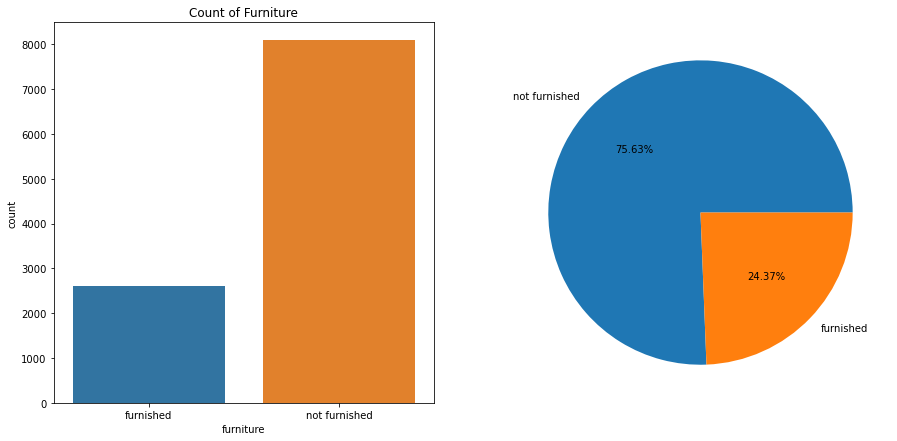

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Furniture")
Percentage=df["furniture"].value_counts()
labels=df["furniture"].value_counts().index

sns.countplot(x=df["furniture"],ax=ax[0])
plt.pie(Percentage,labels=labels,autopct="%0.2f%%")

plt.show()

## Interpretation: Results show that only 77.63% of the estates are well furnished which is the highest in Brazil while 24.37% of the estatesare not well frunished.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the Dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think how the missing values could be treated. \
What kind of graph/chart can be plotted using this data? 

# User defined function for calculating mean, median, mode, standard deviation, and the count of all null values 

In [24]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# 1. Analysis of  the Estates Area: 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [25]:
def info_of_num(col):
    print("The mean of the",col,"is: ",df[col].mean())
    print("The median of the",col,"is: ",df[col].median())
    print("The mode of the",col,"is: ",df[col].mode()[0])
    print("The standard deviation of the",col,"is: ",df[col].std())
    print("Number of missing values in the",col,"is: ",df[col].isnull().sum())

In [26]:
info_of_num("area")

The mean of the area is:  149.21791994014217
The median of the area is:  90.0
The mode of the area is:  50
The standard deviation of the area is:  537.0169423364867
Number of missing values in the area is:  0


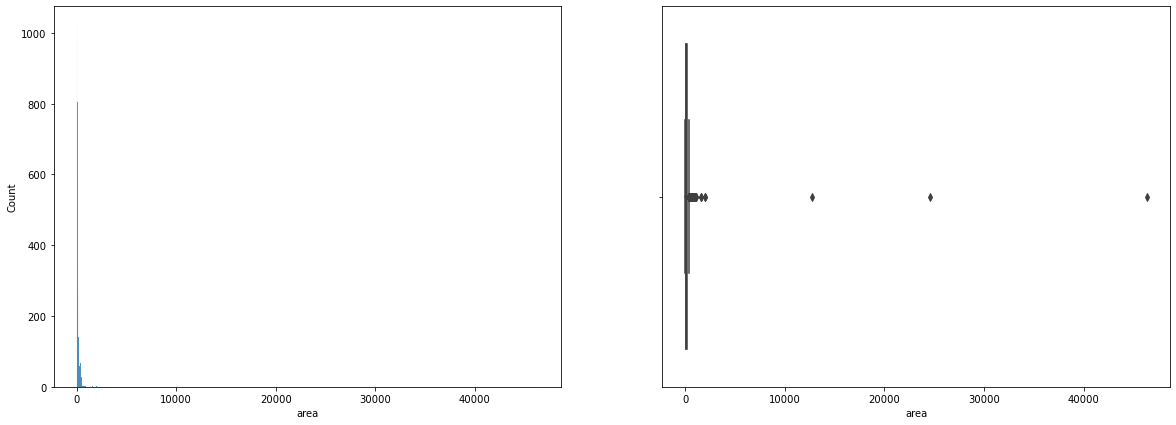

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['area'],ax=ax[0])
sns.boxplot(x=df['area'],ax=ax[1])
plt.show()

# Outliers Analysis and Treatment:
Since the data is skwed IQR based filtering can be used.

In [28]:
df["area"].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

In [29]:
percentile_1=56
percentile_3=182
IQR=percentile_3-percentile_1

In [30]:
upper_limit = percentile_3 + 1.5 * IQR
lower_limit = percentile_1 + 1.5 * IQR

In [31]:
#Finding Outliers
df1=df[df["area"]>upper_limit]
df2=df[df["area"]<lower_limit]


Estates having area above 182 are outliers. To treat the outliers, their area is replaced with the mean. However, this is not the only solution to treat the outliers; machine learning can help in this scenario.

In [32]:
mean= int(df["area"].mean())
x= df[df["area"]> upper_limit].index
for index in x:
    df.loc[index,"area"] = mean

In [33]:
info_of_num("area")

The mean of the area is:  97.75720164609054
The median of the area is:  90.0
The mode of the area is:  149
The standard deviation of the area is:  46.046833628808265
Number of missing values in the area is:  0


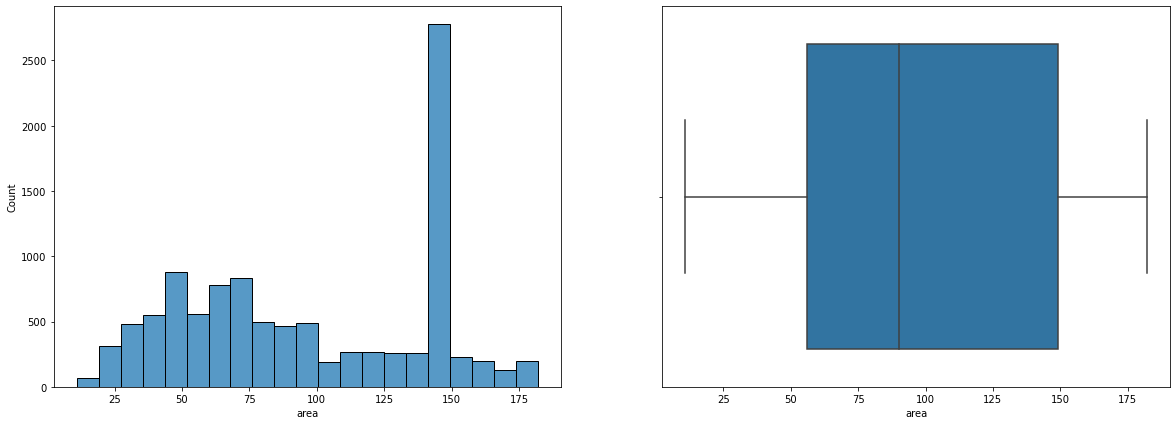

In [34]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['area'],ax=ax[0])
sns.boxplot(x=df['area'],ax=ax[1])
plt.show()

## Interpretation: Most likely, area of the estates follows a normal distribution. Most of the area of estates are between 60 to 140 .


In [35]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# 2. Analysis of  the Home Owner Tax: 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [36]:
info_of_num("hoa (R$)")

The mean of the hoa (R$) is:  1174.0216984661429
The median of the hoa (R$) is:  560.0
The mode of the hoa (R$) is:  0
The standard deviation of the hoa (R$) is:  15592.305248403356
Number of missing values in the hoa (R$) is:  0


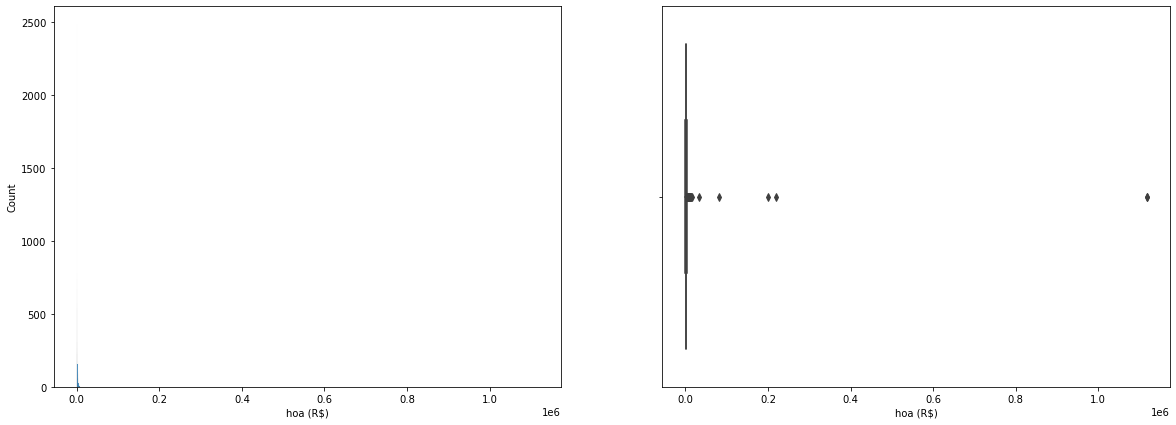

In [37]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['hoa (R$)'],ax=ax[0])
sns.boxplot(x=df['hoa (R$)'],ax=ax[1])
plt.show()

# Outliers Analysis and Treatment:
Since the data is skwed IQR based filtering can be used.

In [38]:
df["hoa (R$)"].describe()

count    1.069200e+04
mean     1.174022e+03
std      1.559231e+04
min      0.000000e+00
25%      1.700000e+02
50%      5.600000e+02
75%      1.237500e+03
max      1.117000e+06
Name: hoa (R$), dtype: float64

In [39]:
percentile_1=1.700000e+02
percentile_3= 1.237500e+03
IQR=percentile_1-percentile_1

In [40]:
upper_limit = percentile_3 + 1.5 * IQR
lower_limit = percentile_1 + 1.5 * IQR

In [41]:
#Finding Outliers
df1=df[df["hoa (R$)"]>upper_limit]
df2=df[df["hoa (R$)"]<lower_limit]

HOA having tax above 1.237500e+03 are outliers. To treat the outliers, their area is replaced with the mean. However, 
this is not the only solution to treat the outliers;machine learning can help in this scenario.

In [42]:
mean= int(df["hoa (R$)"].mean())
x= df[df["hoa (R$)"]>upper_limit].index
for index in x:
    df.loc[index,"hoa (R$)"]=mean

In [43]:
info_of_num("hoa (R$)")

The mean of the hoa (R$) is:  598.3921623643846
The median of the hoa (R$) is:  560.0
The mode of the hoa (R$) is:  1174
The standard deviation of the hoa (R$) is:  455.07133341720015
Number of missing values in the hoa (R$) is:  0


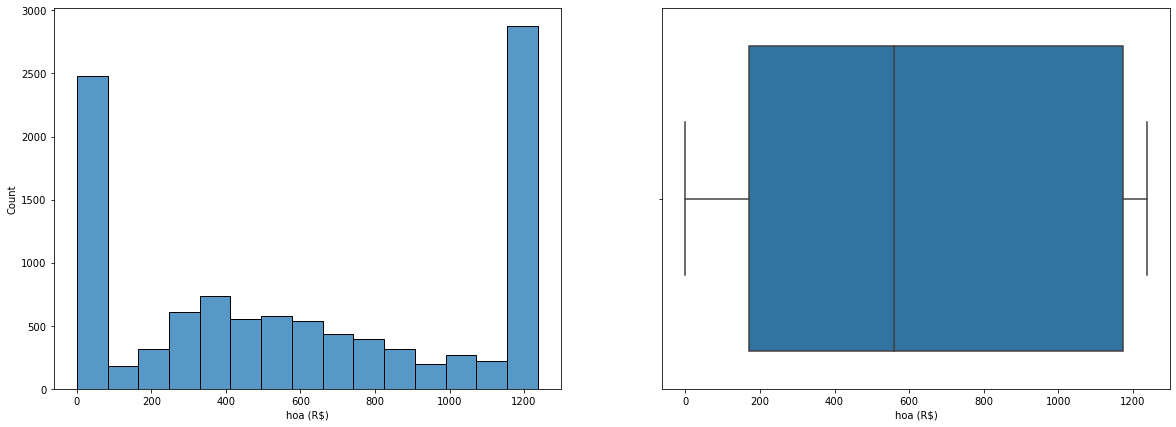

In [44]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['hoa (R$)'],ax=ax[0])
sns.boxplot(x=df['hoa (R$)'],ax=ax[1])
plt.show()

## Interpretation: Most likely, hoa follows a normal distribution. Most of the hoa of estates are between 200 to 1200 .


In [45]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# 3. Analysis of  the Rent Amt: 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [46]:
info_of_num("rent amount (R$)")

The mean of the rent amount (R$) is:  3896.247194163861
The median of the rent amount (R$) is:  2661.0
The mode of the rent amount (R$) is:  2500
The standard deviation of the rent amount (R$) is:  3408.5455176710816
Number of missing values in the rent amount (R$) is:  0


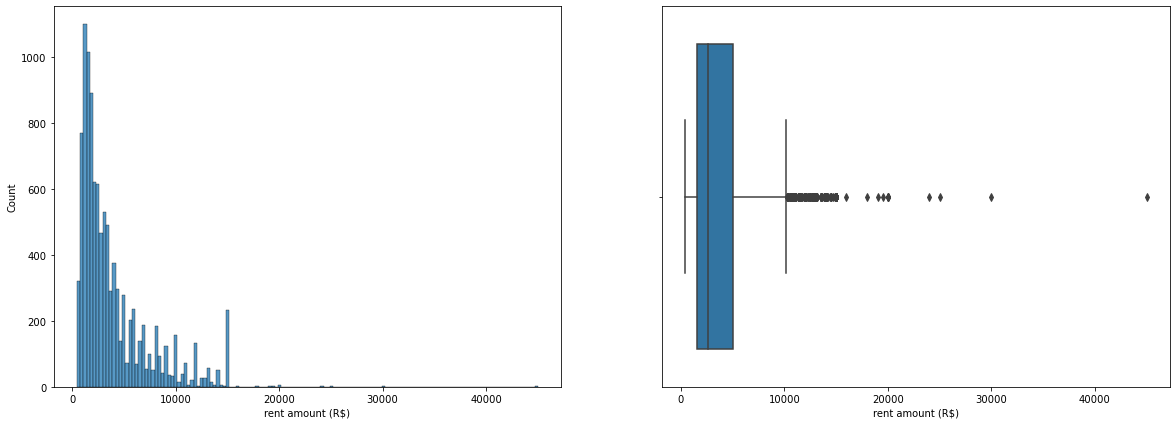

In [47]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['rent amount (R$)'],ax=ax[0])
sns.boxplot(x=df['rent amount (R$)'],ax=ax[1])
plt.show()


Estates having rent amt above 10000 are outliers. To treat the outliers, 
their area is replaced with the mean. However, 
this is not the only solution to treat the outliers; 
machine learning can help in this scenario.

In [48]:
mean= int(df["rent amount (R$)"].mean())
x= df[df["rent amount (R$)"]>10000].index
for index in x:
    df.loc[index,"rent amount (R$)"]=mean

In [49]:
info_of_num("rent amount (R$)")

The mean of the rent amount (R$) is:  3259.319771791994
The median of the rent amount (R$) is:  2661.0
The mode of the rent amount (R$) is:  3896
The standard deviation of the rent amount (R$) is:  2212.3608756405474
Number of missing values in the rent amount (R$) is:  0


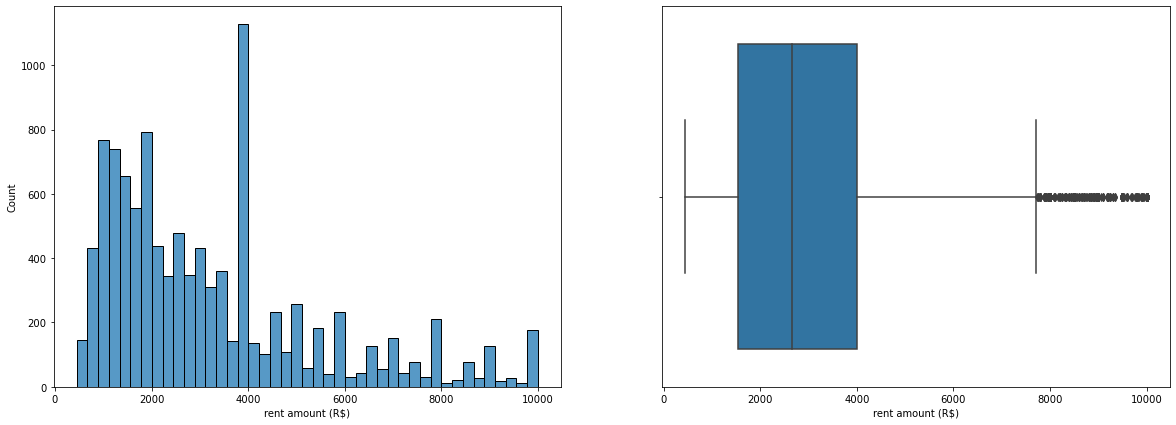

In [50]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['rent amount (R$)'],ax=ax[0])
sns.boxplot(x=df['rent amount (R$)'],ax=ax[1])
plt.show()

## Interpretation: Most likely, area of the estates follows a normal distribution. Most of the rent amt are between 2000 to 4000 

In [51]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# 4. Analysis of  the Rent Amt: 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [52]:
df["property tax (R$)"].describe()

count     10692.000000
mean        366.704358
std        3107.832321
min           0.000000
25%          38.000000
50%         125.000000
75%         375.000000
max      313700.000000
Name: property tax (R$), dtype: float64

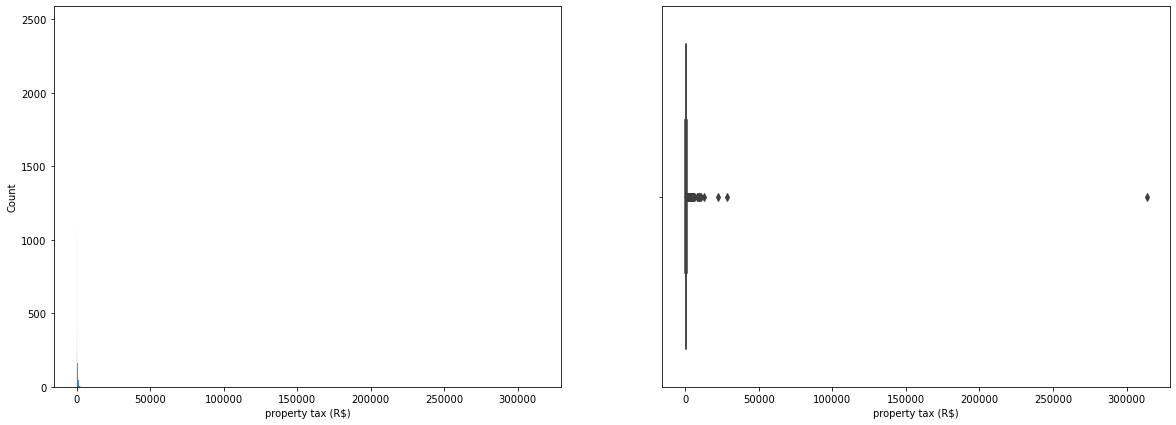

In [53]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['property tax (R$)'],ax=ax[0])
sns.boxplot(x=df['property tax (R$)'],ax=ax[1])
plt.show()

In [54]:
percentile_1=38
percentile_3=375
IQR=percentile_1-percentile_1

In [55]:
upper_limit = percentile_3 + 1.5 * IQR
lower_limit = percentile_1 + 1.5 * IQR

In [56]:
#Finding Outliers
df1=df[df["property tax (R$)"]>upper_limit]
df2=df[df["property tax (R$)"]<lower_limit]

Estates having area above upper_limit are outliers. To treat the outliers, 
their area is replaced with the mean. However, 
this is not the only solution to treat the outliers; 
machine learning can help in this scenario.

In [57]:
mean= int(df["property tax (R$)"].mean())
x= df[df["property tax (R$)"]>upper_limit].index
for index in x:
    df.loc[index,"property tax (R$)"]=mean

In [58]:
info_of_num("property tax (R$)")

The mean of the property tax (R$) is:  169.15740740740742
The median of the property tax (R$) is:  125.0
The mode of the property tax (R$) is:  366
The standard deviation of the property tax (R$) is:  143.06963482210944
Number of missing values in the property tax (R$) is:  0


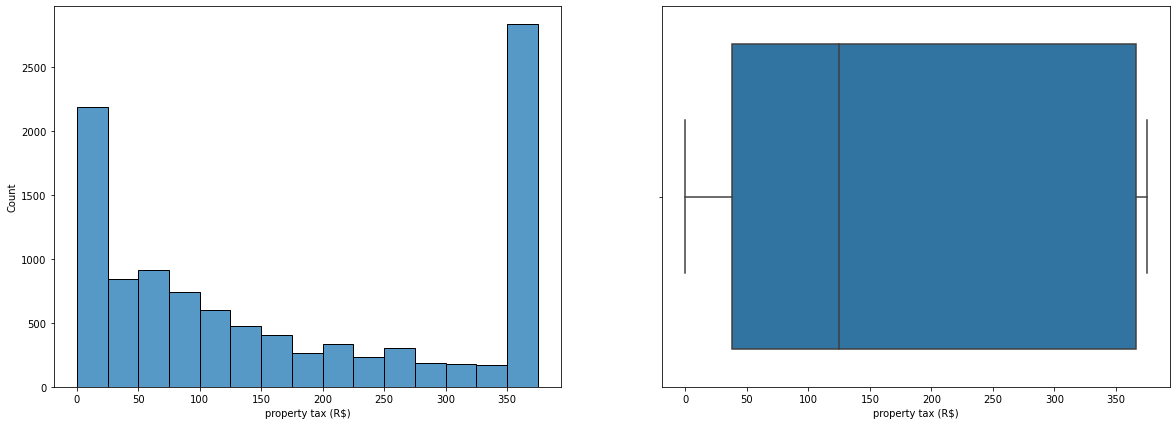

In [59]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['property tax (R$)'],ax=ax[0])
sns.boxplot(x=df['property tax (R$)'],ax=ax[1])
plt.show()

## Interpretation: Most likely, area of the estates follows a normal distribution. Most of the property tax are between 50 to 350 .

# 5. Analysis of  the Fire Insurance Amt: 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [60]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [61]:
info_of_num("fire insurance (R$)")

The mean of the fire insurance (R$) is:  53.300879161990274
The median of the fire insurance (R$) is:  36.0
The mode of the fire insurance (R$) is:  16
The standard deviation of the fire insurance (R$) is:  47.768030930197206
Number of missing values in the fire insurance (R$) is:  0


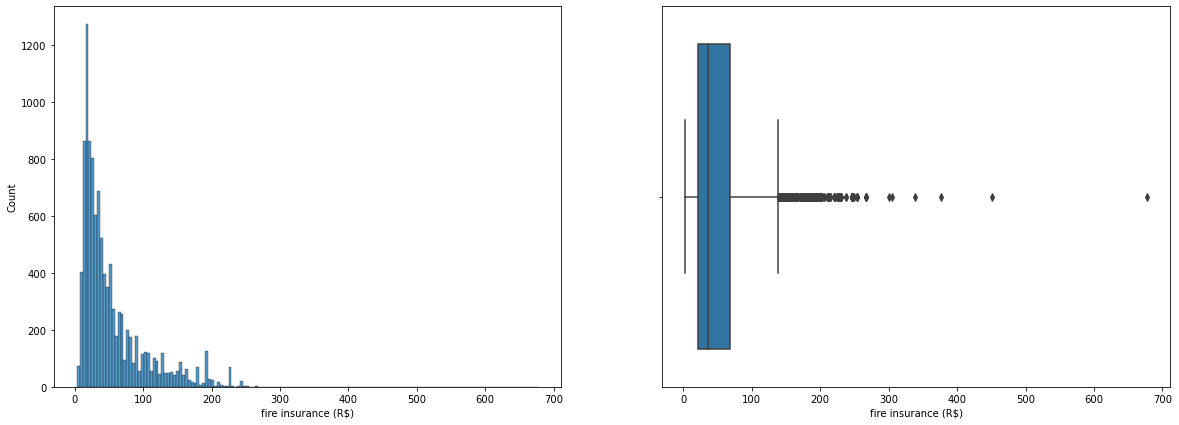

In [62]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['fire insurance (R$)'],ax=ax[0])
sns.boxplot(x=df['fire insurance (R$)'],ax=ax[1])
plt.show()

In [63]:
df["fire insurance (R$)"].describe()

count    10692.000000
mean        53.300879
std         47.768031
min          3.000000
25%         21.000000
50%         36.000000
75%         68.000000
max        677.000000
Name: fire insurance (R$), dtype: float64

In [64]:
percentile_1= 21
percentile_3= 68
IQR=percentile_1-percentile_1

In [65]:
upper_limit = percentile_3 + 1.5 * IQR
lower_limit = percentile_1 + 1.5 * IQR

In [66]:
#Finding Outliers
df1=df[df["fire insurance (R$)"]>upper_limit]
df2=df[df["fire insurance (R$)"]<lower_limit]

Estates having area above 68 are outliers. To treat the outliers, 
their area is replaced with the mean. However, 
this is not the only solution to treat the outliers; 
machine learning can help in this scenario.

In [67]:
mean= int(df["fire insurance (R$)"].mean())
x= df[df["fire insurance (R$)"]> upper_limit].index
for index in x:
    df.loc[index,"fire insurance (R$)"] = mean

In [68]:
info_of_num("fire insurance (R$)")

The mean of the fire insurance (R$) is:  36.18742985409652
The median of the fire insurance (R$) is:  36.0
The mode of the fire insurance (R$) is:  53
The standard deviation of the fire insurance (R$) is:  16.490563256310864
Number of missing values in the fire insurance (R$) is:  0


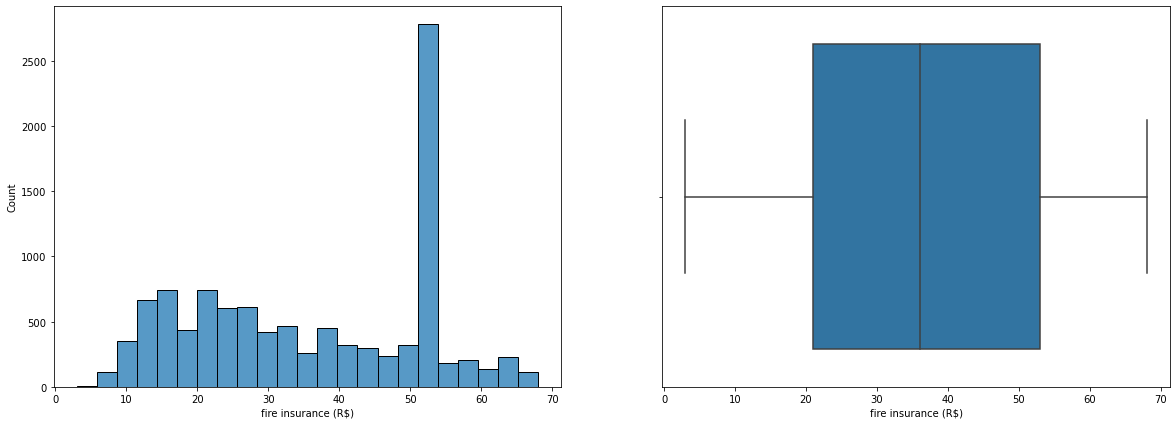

In [69]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['fire insurance (R$)'],ax=ax[0])
sns.boxplot(x=df['fire insurance (R$)'],ax=ax[1])
plt.show()

## Interpretation: Most likely, area of the estates follows a normal distribution. Most of the fire insurance of estates are between 20 to 50 .

# 6. Analysis of  the Total Amt: 
LEVEL 1 Analysis of Numerical Data (Univariate Analysis) 

In [70]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [71]:
df["total (R$)"].describe()

count    1.069200e+04
mean     5.490487e+03
std      1.648473e+04
min      4.990000e+02
25%      2.061750e+03
50%      3.581500e+03
75%      6.768000e+03
max      1.120000e+06
Name: total (R$), dtype: float64

In [72]:
info_of_num("total (R$)")

The mean of the total (R$) is:  5490.4869996258885
The median of the total (R$) is:  3581.5
The mode of the total (R$) is:  2555
The standard deviation of the total (R$) is:  16484.72591235027
Number of missing values in the total (R$) is:  0


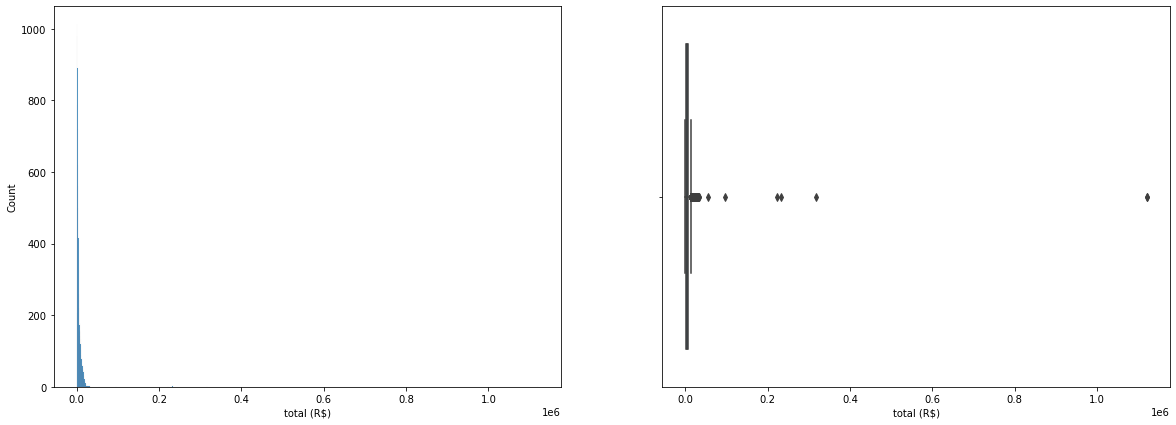

In [73]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['total (R$)'],ax=ax[0])
sns.boxplot(x=df['total (R$)'],ax=ax[1])
plt.show()


In [74]:
percentile_1=2.061750e+03
percentile_3= 6.768000e+03
IQR=percentile_1-percentile_1

In [75]:
upper_limit = percentile_3 + 1.5 * IQR
lower_limit = percentile_1 + 1.5 * IQR

In [76]:
#Finding Outliers
df1=df[df["total (R$)"]>upper_limit]
df2=df[df["total (R$)"]<lower_limit]

Estates having total amt above upper_limit are outliers. To treat the outliers, 
their area is replaced with the mean. However, 
this is not the only solution to treat the outliers; 
machine learning can help in this scenario.

In [77]:
mean= int(df["total (R$)"].mean())
x= df[df["total (R$)"]> upper_limit].index
for index in x:
    df.loc[index,"total (R$)"] = mean

In [78]:

info_of_num("total (R$)")

The mean of the total (R$) is:  3656.3668163112607
The median of the total (R$) is:  3581.5
The mode of the total (R$) is:  5490
The standard deviation of the total (R$) is:  1703.1364285521104
Number of missing values in the total (R$) is:  0


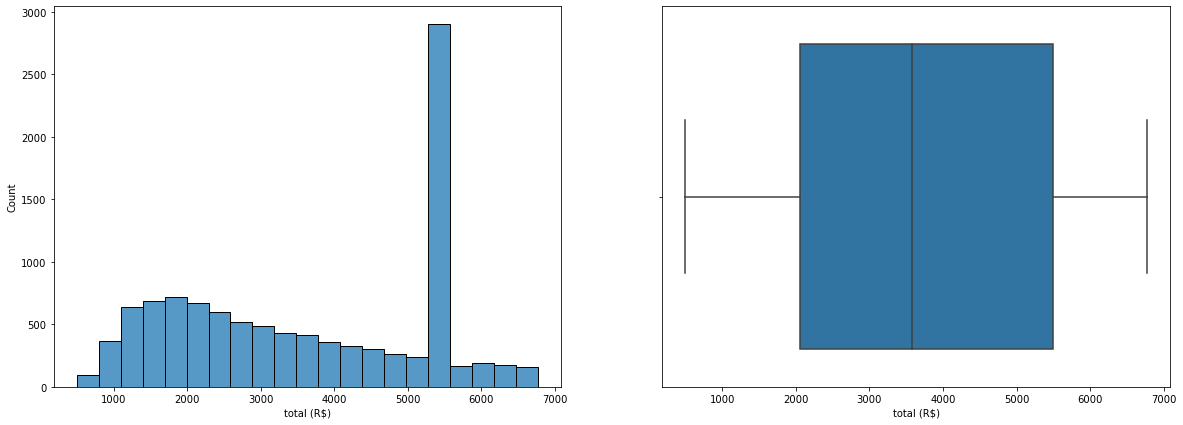

In [79]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df['total (R$)'],ax=ax[0])
sns.boxplot(x=df['total (R$)'],ax=ax[1])
plt.show()

## Interpretation: Most likely, the total amt estates follows a normal distribution. Most of the area of estates are between 2000 to 6000 .

## Level3

In [80]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,5490
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## 1. Bivariate Analysis of city and total amt

In [81]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,5490
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


<AxesSubplot:xlabel='city'>

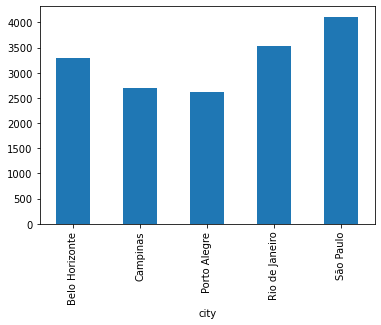

In [82]:
df.groupby(["city"])["total (R$)"].mean().plot(kind = "bar")

## Interpretation: From the above analysis it is clear that those persons who want to relocate to another city will most probably select Porto ALegre as their city of residence since the avg total amt is the lowest among the other cities.

## 2. Bivariate Analysis of furniture and total amt

In [83]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,5490
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


<AxesSubplot:xlabel='furniture'>

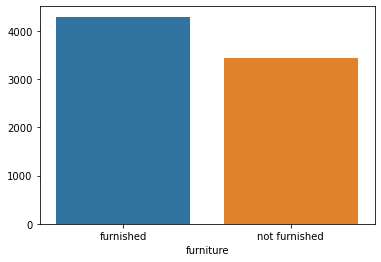

In [84]:
result=df.groupby(["furniture"])["total (R$)"].mean()
sns.barplot(x = result.index, y = result.values)

## Interpretation: From the above analysis it is clear that those persons who want to relocate to another city will most probably select a furnished rooms but since the avg total amt of not furnished is less than the furnished there is a tendency that people might select room that is not well furnished.  

## 3.Multivariate analysis of city, area and total amt

In [85]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,5490
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [86]:
r1=df.groupby(["city"])["area","total (R$)"].mean()
r1

C:\Users\PC\AppData\Local\Temp/ipykernel_10108/1667742128.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r1=df.groupby(["city"])["area","total (R$)"].mean()


,area,total (R$)
city,,
Belo Horizonte,106.952305,3301.364070
Campinas,89.315358,2694.822978
Porto Alegre,81.499581,2617.838223
Rio de Janeiro,87.029980,3534.372418
São Paulo,103.045184,4113.113640


In [87]:
# r1["total (R$)"] = np.log2(r1["total (R$)"])

<AxesSubplot:xlabel='city'>

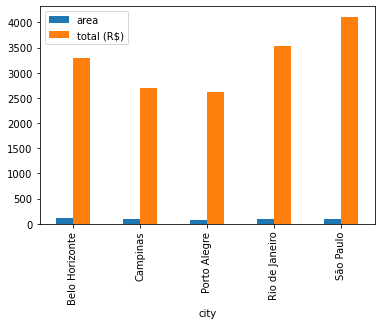

In [88]:
r1.plot(kind = "bar")

In [89]:
#r=df.groupby(["city","furniture"]).agg({'total (R$)': ['mean']}).reset_index()
# r=df.groupby(["city","furniture"]).agg({'total (R$)': ['sum']})
# r

## Interpretation: From the above analysis it is clear that those persons who want to relocate to another city will most probably select Proto Alegre because the area of the rooms will be less and the cost of the rooms will also be less.It is important to note that the rooms avaialble in porto alegre will only accomodate atmost 2 persons at a time. 

## 4.Multivariate analysis of city, area and rooms

In [90]:
r2=df.groupby(["city"])["area","rooms"].mean()
r2

C:\Users\PC\AppData\Local\Temp/ipykernel_10108/3796347790.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r2=df.groupby(["city"])["area","rooms"].mean()


,area,rooms
city,,
Belo Horizonte,106.952305,3.020668
Campinas,89.315358,2.355217
Porto Alegre,81.499581,2.140821
Rio de Janeiro,87.029980,2.243837
São Paulo,103.045184,2.558859


<AxesSubplot:xlabel='city'>

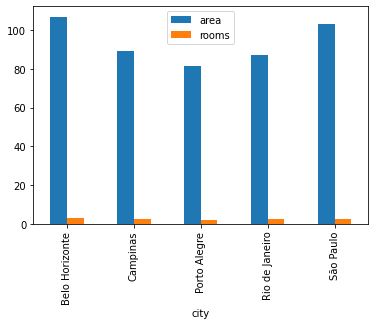

In [91]:
# r2.plot(kind = 'scatter', x = 'rooms', y = 'area')
#r2["total (R$)"] = np.log2(r1["total (R$)"])
r2.plot(kind = "bar")

## Interpretation: From the above analysis it is clear that those persons who want to relocate to another city will most probably select Proto Alegre because the area of the rooms will be less and the no of rooms will also be less(~2).It is important to note that the rooms avaialble in porto alegre will only accomodate atmost 2 persons at a time.

## 5 How does the acceptance of the animal affect the hoa for the Porto Alegre city?

In [92]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,5490
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


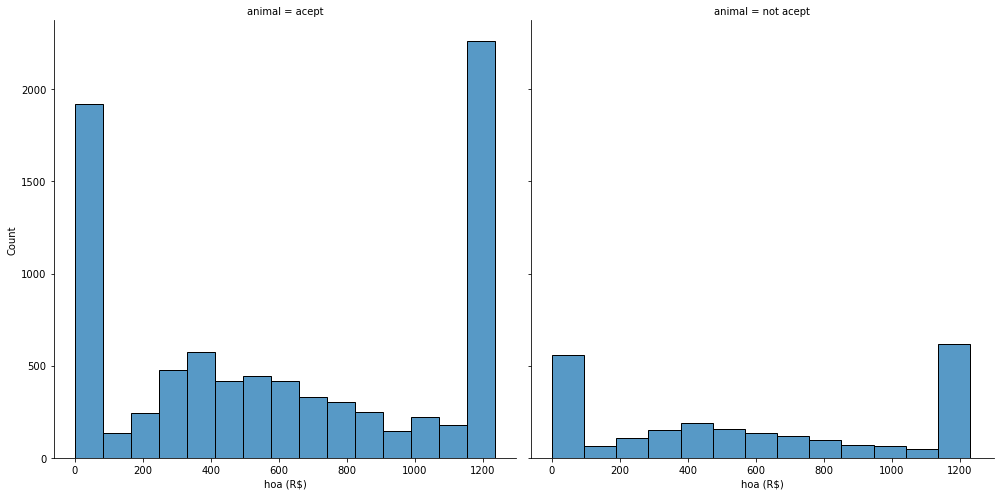

In [93]:
data = df[(df["animal"] == "acept") | (df["animal"] == "not acept") | (df["city"]== "Porto Alegre")]
g = sns.FacetGrid(data, col = "animal", height = 7)
g.map(sns.histplot, "hoa (R$)")
plt.show()

## Interpretation: From the above analysis it is clear that those persons who want to relocate to  Porto Alegre will will have to give more taxes as compared to the estates where animals are not accepted and hence less hoa is expected.

## 6 How does the acceptance of the animal affect the hoa for the Porto Alegre city?

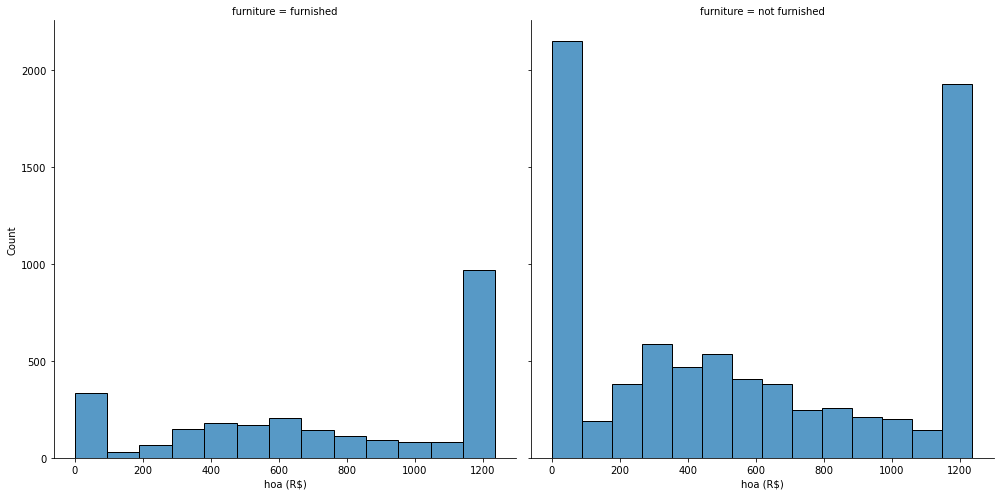

In [94]:
data1 = df[(df["furniture"] == "furnished") | (df["furniture"] == "not furnished") | (df["city"]== "Porto Alegre")]
g = sns.FacetGrid(data, col = "furniture", height = 7)
g.map(sns.histplot, "hoa (R$)")
plt.show()

## Interpretation: From the above analysis it is clear that those persons who want to relocate to  Porto Alegre will will have to give more taxes for a non furnished room as compared to the rooms which are well furnished and hence less hoa is expected.

## 7. How does the area of the estates affect the property tax?

<AxesSubplot:xlabel='area', ylabel='property tax (R$)'>

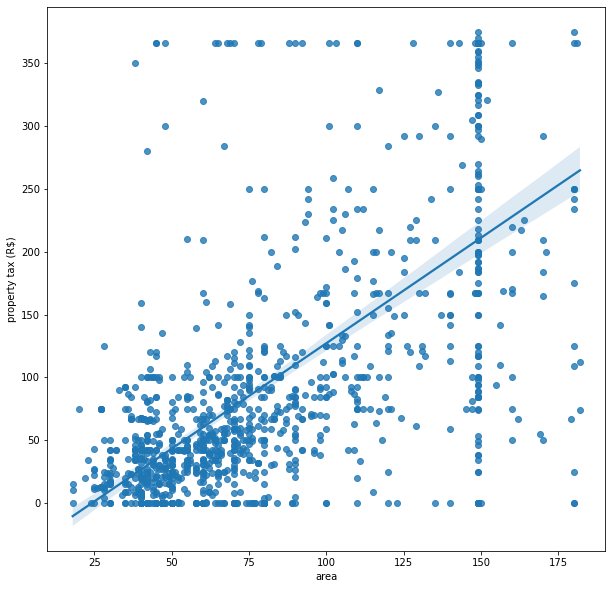

In [95]:
r3=df[(df["city"]== "Porto Alegre")]
fig,ax=plt.subplots(figsize=(10,10))
sns.regplot(ax=ax,x = 'area', y = 'property tax (R$)',data=r3)

## Interpretation: From the above analysis it is clear that  in the city of Port Alegre ,with increase in the area of the rooms the cost of the property taxes will also increase.

## From the above analysis it is clear that if a person wants to relacate they should select Proto Alegre Below are more evidences to prove the theory... 

##  Bivariate Analysis of hoa and city

In [112]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,1174,3300,211,42,5618
1,São Paulo,149,4,4,0,20,acept,not furnished,1200,4960,366,63,5490
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [113]:
d1=df.groupby(["city"])["hoa (R$)"].mean()

<AxesSubplot:xlabel='city'>

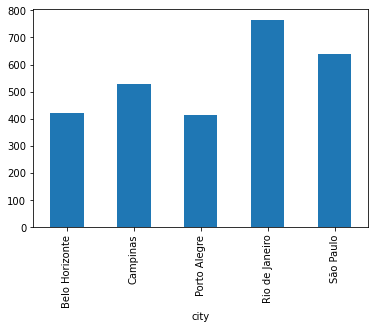

In [114]:
d1.plot(kind = "bar")

## The avg amt of hoa is the least for the Proto Alegre city, it makes clear that if a person has to relocate should relocate to Porto Alegre. It is to be noted that the avg rooms in the Proto Alegre can only accomodate atmost 2 person.   

## Bivariate Analysis of city and rent amt

In [119]:
d2=df.groupby(["city"])["rent amount (R$)"].mean()

<AxesSubplot:xlabel='city'>

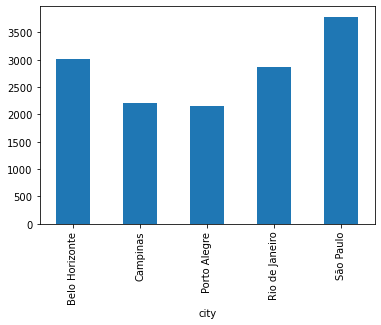

In [120]:
d2.plot(kind = "bar")

## The avg amt of rent is the least for the Proto Alegre city, it makes clear that if a person has to relocate should relocate to Porto Alegre. It is to be noted that the avg rooms in the Proto Alegre can only accomodate atmost 2 person.   

In [121]:
d3=df.groupby(["city"])["property tax (R$)"].mean()

<AxesSubplot:xlabel='city'>

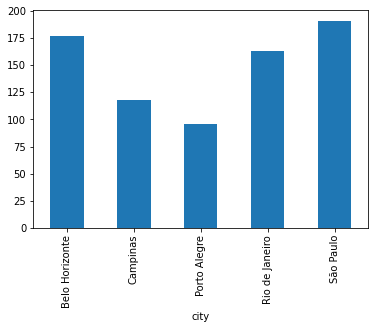

In [122]:
d3.plot(kind = "bar")

## The avg amt of property tax is the least for the Proto Alegre city, it makes clear that if a person has to relocate should relocate to Porto Alegre. It is to be noted that the avg rooms in the Proto Alegre can only accomodate atmost 2 person.   

In [127]:
d4=df.groupby(["city"])["fire insurance (R$)"].mean()
d4

city
Belo Horizonte    33.956280
Campinas          26.091442
Porto Alegre      29.129086
Rio de Janeiro    33.069953
São Paulo         40.352302
Name: fire insurance (R$), dtype: float64

<AxesSubplot:xlabel='city'>

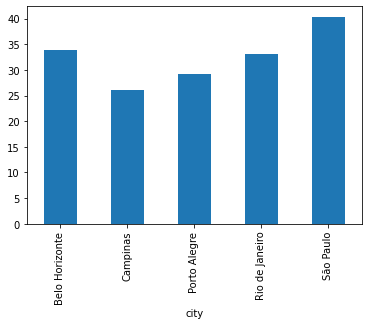

In [124]:
d4.plot(kind = "bar")

## The avg amt of fire insurance is the least for the Proto Alegre city, it makes clear that if a person has to relocate should relocate to Porto Alegre. It is to be noted that the avg rooms in the Proto Alegre can only accomodate atmost 2 person.   

In [125]:
d5=df.groupby(["city"])["total (R$)"].mean()

<AxesSubplot:xlabel='city'>

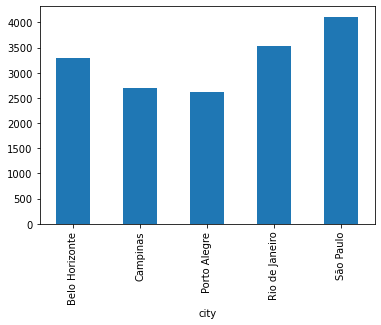

In [126]:
d5.plot(kind = "bar")

## The avg amt of total is the least for the Proto Alegre city, it makes clear that if a person has to relocate should relocate to Porto Alegre. It is to be noted that the avg rooms in the Proto Alegre can only accomodate atmost 2 person.   

## Conclusion:-

# From the above analysis done by the data analyst who works for The Castro Brazila Inc. it is clear that the person who wants to relocate to another location should select Porto Alegre since it is cheap and has all the basic amenities that a person needs.